In [ ]:
//@version=6
//indicator("v5", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)
indicator("Sunstoic", "v6 Sunstoic", true, max_bars_back = 5000, max_boxes_count = 500, max_lines_count = 500, max_labels_count = 500)


//candle logic
// === Inputs ===
bCol = input.color(#008080, title="Bull Border")
rCol = input.color(#e20000, title="Bear Border")
bgB = input.color(color.new(#008080, 20), title="Bull Body")
bgR = input.color(color.new(#FF0000, 20), title="Bear Body")


    // === Input your time zone (Manila = GMT+8) 
timeSessionStart = timestamp("GMT+8", year, month, dayofmonth, 6, 0)  // Start of day
isNewDay = ta.change(time("D"))  // Detect new day

// Track the current day's developing close on each bar
var float devClose = na
if bool(isNewDay)
    devClose := close  // reset on new day
else
    devClose := close  // update each bar


// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)


// Calculate daily high and low using 'day' timeframe
var float dailyHigh = na
var float dailyLow = na
newDay = ta.change(time("D"))


// On new day, reset high/low
if bool(newDay)
    dailyHigh := close
    dailyLow := open
else
    dailyHigh := math.max(dailyHigh, close)
    dailyLow := math.min(dailyLow, open)


// Midpoint of the daily candle
midPrice = (dailyHigh + dailyLow) / 2


dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR


// Offset for visuals
ofs = 10
bw = 2
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)


// Body of daily candle box
var box dBx = na
box.delete(dBx)
tB = math.max(dO, devClose) //y=dC
bB = math.min(dO, devClose)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)


// Wicks for daily candle
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)



// Labels for daily candle
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)


lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2

lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=devClose, text="6C " + str.tostring(dC, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
stt = timestamp("UTC", year, month, dayofmonth, sh, sm)


var float cO = na
var float cH = na
var float cL = na
var float cC = na


if (time == stt)
    cO := open
    cH := high
    cL := low
    cC := close


if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close


cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR


cOfs = 12
cbw = 2
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)


// Custom body box
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, devClose) //y=dC
cbB = math.min(cO, devClose)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)


// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)


// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)


clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2


clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=devClose, text="8C " + str.tostring(dC, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// === High and Low Lines (using bar_index for x coords) ===
// Track bar_index of high and low bars within current day
var int highBarIndex = na
var int lowBarIndex = na
var float dayHigh = na
var float dayLow = na


startOfDay = timestamp(year, month, dayofmonth, 0, 0)
t6amManila = timestamp("Asia/Manila", year, month, dayofmonth, 6, 0)


issNewDay = ta.change(time("D"))


if (time >= startOfDay)
    if na(dayHigh) or high > dayHigh
        dayHigh := high
        highBarIndex := bar_index
    if na(dayLow) or low < dayLow
        dayLow := low
        lowBarIndex := bar_index


if bool(issNewDay)
    dayHigh := na
    dayLow := na
    highBarIndex := na
    lowBarIndex := na


// Draw high line from high bar index to current xMid
var line highLine = na
if not na(dayHigh) and not na(highBarIndex)
    if na(highLine)
        highLine := line.new(x1=highBarIndex, y1=dayHigh, x2=xMid, y2=dayHigh, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(highLine, highBarIndex, dayHigh)
        line.set_xy2(highLine, xMid, dayHigh)


// Draw low line from low bar index to current xMid
var line lowLine = na
if not na(dayLow) and not na(lowBarIndex)
    if na(lowLine)
        lowLine := line.new(x1=lowBarIndex, y1=dayLow, x2=xMid, y2=dayLow, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(lowLine, lowBarIndex, dayLow)
        line.set_xy2(lowLine, xMid, dayLow)





// --- 6:00 AM Asia/Manila horizontal line ---
// Manila 6:00 AM timestamp today
manila_6am = timestamp("GMT+8", year, month, dayofmonth, 30, 0)


// Detect bar where time crosses 6:00 AM Manila
isStartBar6am = (time >= manila_6am) and (time[1] < manila_6am)


// Store 6:00 AM bar open price and index
var float price6am = na
var int bar6am_index = na


if isStartBar6am
    price6am := open
    bar6am_index := bar_index


// Draw horizontal line from 6AM bar index to xMid at price6am
var line hLine6am = na


if not na(price6am) and not na(bar6am_index)
    line.delete(hLine6am)
    hLine6am := line.new(x1=bar6am_index, y1=price6am, x2=xMid, y2=price6am, color=color.new(#000000, 0), width=1, style=line.style_solid)


// --- 8:00 AM Asia/Manila horizontal line ---
// Detect bar where time crosses 8:00 AM Manila
isStartBar8am = (time >= stt) and (time[1] < stt)


// Store 8:00 AM bar open price and index
var float price8am = na
var int bar8am_index = na


if isStartBar8am
    price8am := open
    bar8am_index := bar_index


// Draw horizontal line from 8AM bar index to cX at price8am
var line hLine8am = na
var line hhLine8am = na


if not na(price8am) and not na(bar8am_index)
    line.delete(hLine8am)
    hLine8am := line.new(x1=bar8am_index, y1=price8am, x2=cX, y2=price8am, color=color.new(#000000, 0), width=1, style=line.style_solid)



// Draw horizontal line that updates000000000000000000000000
var line devCloseLine = na
var line ddevCloseLine = na
if bar_index > 0
    if na(devCloseLine)
        devCloseLine := line.new(x1=bar_index, y1=devClose , x2=xMid , y2=devClose, style = line.style_solid, color=color.new(#ecc900, 0), width=1)
    else
        line.set_xy1(devCloseLine, bar_index, devClose)
        line.set_xy2(devCloseLine, bar_index + 13, devClose)
    if na(ddevCloseLine) 
        //ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid, y2=devClose, extend=extend.right, color=dCol, width=2)
        ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid , y2=devClose, style = line.style_dotted, extend=extend.right, color=color.black, width=1)
    else
        line.set_xy1(ddevCloseLine, bar_index + 19,  devClose)
        line.set_xy2(ddevCloseLine, bar_index + 20, devClose)



//zone logic
// Disable visuals if timeframe is higher than 1 hour
isValidTF = timeframe.isminutes and timeframe.multiplier <= 60


// Current time components
currentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define 12PM to 12AM session
start12pm = timestamp(year, month, dayofmonth, 12, 0)
end12am = timestamp(year, month, dayofmonth, 23, 59)
in12pmTo12am = currentTime >= start12pm and currentTime <= end12am

// Define 8AM to 8PM session
start8am = timestamp(year, month, dayofmonth, 8, 0)
end8pm = timestamp(year, month, dayofmonth, 20, 0)
in8amTo8pm = currentTime >= start8am and currentTime <= end8pm

// Define 6PM to 8PM session
start6pm = timestamp(year, month, dayofmonth, 6, 0)
eend8pm = timestamp(year, month, dayofmonth, 8, 0)
in6pmTo8pm = currentTime >= start6pm and currentTime <= eend8pm

start6am = timestamp(year, month, dayofmonth, 18, 0)
eend8am = timestamp(year, month, dayofmonth, 20, 0)
in6amTo8am = currentTime >= start6am and currentTime <= eend8am

// Apply background highlights
bgcolor(isValidTF and in12pmTo12am ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in8amTo8pm ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in6pmTo8pm ? color.new(color.black, 97) : na)
bgcolor(isValidTF and in6amTo8am ? color.new(color.black, 95) : na)

// Get the current day of the week and the current time
isMonday = dayofweek == dayofweek.sunday
ccurrentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define the time range for 6:00 AM to 8:00 AM
startTime = timestamp(year, month, dayofmonth, 18, 6) // 6:00 AM
endTime = timestamp(year, month, dayofmonth, 20, 0) // 8:00 AM

// Check if it's Monday and the current time is within the range of 6:00 AM to 8:00 AM
isInTimeRange = isMonday and ccurrentTime >= startTime and ccurrentTime <= endTime

// Highlight the area with a background color
bgcolor(isValidTF and isInTimeRange ? color.new(color.blue, 90) : na)

// Vertical lines logic
// Only show vertical lines if timeframe is intraday and valid
showLines = timeframe.isintraday and isValidTF

// Convert current bar time to Asia/Manila timezone
t = time(timeframe.period, 'Asia/Manila')

// Target hours excluding 0, 12, 20
var array<int> targetHours = array.from(3, 6, 8, 15, 24) // 24 means midnight (0h)

// Special hours separated
specialHour20 = 20
specialHour0 = 0 // midnight
specialHour12 = 12 // noon

// Function to check if current bar time matches any target hour exactly at minute zero
isTargetTime() =>
    h = hour(t)
    m = minute(t)
    match = false
    for i = 0 to array.size(targetHours) - 1 by 1
        if (h == array.get(targetHours, i) or h == 0 and array.get(targetHours, i) == 24) and m == 0
            match := true
            match
    match

// Check if current time matches special hour 20 at minute zero
isSpecialTime20() =>
    h = hour(t)
    m = minute(t)
    h == specialHour20 and m == 0

// Check if current time matches special hour 0 at minute zero
isSpecialTime0() =>
    h = hour(t)
    m = minute(t)
    h == specialHour0 and m == 0

// Check if current time matches special hour 12 at minute zero
isSpecialTime12() =>
    h = hour(t)
    m = minute(t)
    h == specialHour12 and m == 0

// Detect new day (day break)
nnewDay = ta.change(time('D'))

// Only draw lines if timeframe is intraday and valid
if showLines
    // Draw vertical line at day break (green, width 1)
    if bool(nnewDay)
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(76, 175, 79, 90), width = 1, extend = extend.both)

    // Draw vertical line at target times (blue, width 1)
    if isTargetTime()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(33, 149, 243, 95), width = 1, extend = extend.both)

    // Draw vertical line at special hour 20 (teal, width 1)
    if isSpecialTime20()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.new(color.teal, 50), width = 1, extend = extend.both)

    // Draw vertical line at special hour 0 (midnight) - orange, dotted
    if isSpecialTime0()
        var line midnightLine = na
        midnightLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(255, 153, 0, 50), width = 1, extend = extend.both)
        line.set_style(midnightLine, line.style_dotted)

    // Draw vertical line at special hour 12 (noon) - red, dotted
    if isSpecialTime12()
        var line noonLine = na
        noonLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(255, 82, 82, 50), width = 1, extend = extend.both)
        line.set_style(noonLine, line.style_dotted)

//hourly logic
// === UTILITY FUNCTION ===
f_show(tf) =>
    timeframe.period != tf

// === HOURLY ===
hH = request.security(syminfo.tickerid, '60', high, lookahead = barmerge.lookahead_on)
hL = request.security(syminfo.tickerid, '60', low, lookahead = barmerge.lookahead_on)
hIdx = request.security(syminfo.tickerid, '60', bar_index, lookahead = barmerge.lookahead_on)

var int hPrev = na
var float hHi = na
var int hHiBar = na
var line hHiLine = na
var bool hHiOn = false
var float hLo = na
var int hLoBar = na
var line hLoLine = na
var bool hLoOn = false

if hIdx != hPrev
    hPrev := hIdx
    hHi := na
    hHiBar := na
    line.delete(hHiLine)
    hHiLine := na
    hHiOn := false
    hLo := na
    hLoBar := na
    line.delete(hLoLine)
    hLoLine := na
    hLoOn := false
    hLoOn

if hHiOn and not na(hHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hHi <= bMax and hHi >= bMin
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)
        hHiOn := false
        hHiOn
    else
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)

if hLoOn and not na(hLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hLo <= bMax and hLo >= bMin
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)
        hLoOn := false
        hLoOn
    else
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)


// === D/W/M High-Low Steplines ===
ddH = request.security(syminfo.tickerid, 'D', high, lookahead = barmerge.lookahead_on)
ddL = request.security(syminfo.tickerid, 'D', low, lookahead = barmerge.lookahead_on)
wH = request.security(syminfo.tickerid, 'W', high, lookahead = barmerge.lookahead_on)
wL = request.security(syminfo.tickerid, 'W', low, lookahead = barmerge.lookahead_on)
mH = request.security(syminfo.tickerid, 'M', high, lookahead = barmerge.lookahead_on)
mL = request.security(syminfo.tickerid, 'M', low, lookahead = barmerge.lookahead_on)

plot(f_show('60') ? hH : na, title = 'H High', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('60') ? hL : na, title = 'H Low', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('D') ? ddH : na, title = 'D High', color = color.new(color.green, 50), style = plot.style_stepline)
plot(f_show('D') ? ddL : na, title = 'D Low', color = color.new(color.green, 70), style = plot.style_stepline)
plot(f_show('W') ? wH : na, title = 'W High', color = color.new(color.blue, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('W') ? wL : na, title = 'W Low', color = color.new(color.blue, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('M') ? mH : na, title = 'M High', color = color.new(color.purple, 90), style = plot.style_stepline, linewidth = 3)
plot(f_show('M') ? mL : na, title = 'M Low', color = color.new(color.purple, 90), style = plot.style_stepline, linewidth = 3)


//vwap logic
// VWAP calculation from 1-minute data
f_vwap_calc() =>
    var float cumPV = 0.0
    var float cumVol = 0.0
    var float cumPV_buy = 0.0
    var float cumVol_buy = 0.0
    var float cumPV_sell = 0.0
    var float cumVol_sell = 0.0

    // Reset on new day
    if bool(ta.change(time('D')))
        cumPV := 0.0
        cumVol := 0.0
        cumPV_buy := 0.0
        cumVol_buy := 0.0
        cumPV_sell := 0.0
        cumVol_sell := 0.0
        cumVol_sell

    buyVol = close > open ? volume : 0.0
    sellVol = close < open ? volume : 0.0

    cumPV := cumPV + close * volume
    cumVol := cumVol + volume

    cumPV_buy := cumPV_buy + close * buyVol
    cumVol_buy := cumVol_buy + buyVol

    cumPV_sell := cumPV_sell + close * sellVol
    cumVol_sell := cumVol_sell + sellVol

    vwap = cumVol != 0 ? cumPV / cumVol : na
    buyVWAP = cumVol_buy != 0 ? cumPV_buy / cumVol_buy : na
    sellVWAP = cumVol_sell != 0 ? cumPV_sell / cumVol_sell : na

    [vwap, buyVWAP, sellVWAP]

// Pull 1-minute VWAP values
[vwap_1m, buyVWAP_1m, sellVWAP_1m] = request.security(syminfo.tickerid, '1', f_vwap_calc())

// Only show on intraday charts
showVWAP = not timeframe.isdaily and not timeframe.isweekly and not timeframe.ismonthly
  
// Plot VWAPs with conditional display
plot_vwap = plot(showVWAP ? vwap_1m : na, color = color.rgb(238, 218, 90), linewidth = 1, title = 'VWAP (1m)')
//plot_buy_vwap = plot(showVWAP ? buyVWAP_1m : na, color = color.rgb(0, 137, 123, 80), linewidth = 1, title = 'Buy Delta VWAP (1m)')
//plot_sell_vwap = plot(showVWAP ? sellVWAP_1m : na, color = color.rgb(255, 82, 82, 80), linewidth = 1, title = 'Sell Delta VWAP (1m)')

// Fill areas
//fill(plot_vwap, plot_buy_vwap, color = showVWAP ? color.new(color.teal, 95) : na, title = 'Buy VWAP Fill')
//fill(plot_vwap, plot_sell_vwap, color = showVWAP ? color.new(color.red, 95) : na, title = 'Sell VWAP Fill')

//table logic
// === Function to get OHLC of specified candle ===
get_prev_ohlc(tf, shift) =>
    o = request.security(syminfo.tickerid, tf, open[shift])
    h = request.security(syminfo.tickerid, tf, high[shift])
    l = request.security(syminfo.tickerid, tf, low[shift])
    c = request.security(syminfo.tickerid, tf, close[shift])
    [o, h, l, c]

// === Function to calculate ranges and colors ===
get_data(tf, shift) =>
    [o, h, l, c] = get_prev_ohlc(tf, shift)
    full_range = h - l
    oc_range = math.abs(c - o)
    hl_range = h - l
    is_bull = c > o
    bg_color = is_bull ? color.new(color.teal, 90) : color.new(color.red, 90)
    [full_range, oc_range, hl_range, bg_color]

// === Daily Candle Data ===
[d1_fr, d1_oc, d1_hl, d1_bg] = get_data("D", 1)
[d2_fr, d2_oc, d2_hl, d2_bg] = get_data("D", 2)

// === Weekly Candle Data ===
[w0_fr, w0_oc, w0_hl, w0_bg] = get_data("W", 0) // Developing Week
[w1_fr, w1_oc, w1_hl, w1_bg] = get_data("W", 1)
[w2_fr, w2_oc, w2_hl, w2_bg] = get_data("W", 2)


// Daily candle (6:00 AM)
sixambgcolor = dO < dC ?  color.rgb(0, 137, 123, 90) : color.rgb(255, 82, 82, 90)

// Custom candle (8:00 AM Manila)
eightambgcolor = cO < cC ?  color.rgb(0, 137, 123, 90) : color.rgb(255, 82, 82, 90) 

// Adjust UTC time to Manila (UTC+8) qewrqwerwerwerwerwerew
manilaTime = time + 8 * 60 * 60 * 1000  // Shift by 8 hours in milliseconds

// Extract date components from Manila time
manilaYear  = year(manilaTime)
manilaMonth = month(manilaTime)
manilaDay   = dayofmonth(manilaTime)

// Format date as "DD/MM/YYYY"
formattedDate = str.tostring(manilaDay, "00") + "/" + str.tostring(manilaMonth, "00") + "/" + str.tostring(manilaYear)

// Track day changes in Manila time
var int prevManilaDay = na
newManilaDay = manilaDay != prevManilaDay

// Update stored day
if newManilaDay
    prevManilaDay := manilaDay
//qweqweqweqweqeqweqweqwewqeqwewqeqe

// UTC/UTC+8 Time
var label utcLbl = na
var label utc8Lbl = na
label.delete(utcLbl)
label.delete(utc8Lbl)

//utcStr = "UTC: " + str.tostring(hour, "00") + ":" + str.tostring(minute, "00")
uutcStr = str.tostring(hour, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"
utc8H = (hour + 12) % 24
//utc8Str = "UTC: " + str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00")
uutc8Str =str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"

// TF Label
var label tfLbl = na
label.delete(tfLbl)
var label tfLbl2 = na
label.delete(tfLbl2)

tfS = ""
if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "m")
    tfS := "m"
else if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "h")
    tfS := "h"
tfP = str.replace(timeframe.period, tfS, "")
tfText = tfP + tfS + "m 𝘪𝘯𝘵𝘰 1D"

// Range Labels
dHL = math.abs(dH - dL)
dOC = math.abs(dO - dC)
cHL = math.abs(cH - cL)
cOC = math.abs(cO - cC)

// === Create and update table ===
var table tt = table.new(position.top_right, 80, 80, border_width=1)

if bar_index == 1
    table.cell(tt, 0, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

    table.cell(tt, 0, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))
 
// === Daily Rows ===
table.cell(tt, 1, 2, "𝑺𝒑𝒆𝒄𝒊𝒇𝒊𝒄𝒂𝒕𝒊𝒐𝒏", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 3, "Date", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 3, formattedDate, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))
 
table.cell(tt, 0, 4, "Time", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 4, text = uutc8Str, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))
 
table.cell(tt, 0, 5, "Time", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 5, text=uutcStr, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 6, "Type", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 6, text=tfText, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90), text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 7, "𝑯𝒊𝒈𝒉𝒆𝒓 𝑻𝑭", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 8, "6:00\nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 8, "HL | $" + str.tostring(dHL, "#") + "\nOC | $" + str.tostring(dOC, "#"), text_size = size.tiny, bgcolor = sixambgcolor, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 9, "8:00\nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 9, "HL | $" + str.tostring(cHL, "#") + "\nOC | $" + str.tostring(cOC, "#"), text_size = size.tiny, bgcolor = eightambgcolor, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 11, "1D 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 12, "-1D \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 12, "HL | $" + str.tostring(d1_hl, "#") + "\nOC | $" + str.tostring(d1_oc, "#"), text_size = size.tiny, bgcolor=d1_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 13, "-2D \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 13, "HL | $" + str.tostring(d2_hl, "#") + "\nOC | $" + str.tostring(d2_oc, "#"), text_size = size.tiny, bgcolor=d2_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 14, "1W 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 15, "0W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 15, "HL | $" + str.tostring(w0_hl, "#") + "\nOC | $" + str.tostring(w0_oc, "#"), text_size = size.tiny, bgcolor=w0_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 16, "-1W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 16, "HL | $" + str.tostring(w1_hl, "#") + "\nOC | $" + str.tostring(w1_oc, "#"), text_size = size.tiny, bgcolor=w1_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 0, 17, "-2W \nяαηgє", text_size = size.tiny, text_color = color.white)
table.cell(tt, 1, 17, "HL | $" + str.tostring(w2_hl, "#") + "\nOC | $" + str.tostring(w2_oc, "#"), text_size = size.tiny, bgcolor=w2_bg, text_color = color.rgb(255, 255, 255, 30))

table.cell(tt, 1, 18, "© 2025 𝚆𝚀𝚜", text_color = color.white, text_size = size.tiny, bgcolor = color.black)

//developinf day 
// === INPUTS ===
startSession = input.session("0000-2359", title="Session Time")
sshowLines = input.bool(true, title="Show Lines")
showLabels = input.bool(true, title="Show Labels")

// === TIME LOGIC ===
isNNewDay = ta.change(time("D"))

// === DEVELOPING HIGH/LOW TRACKING ===
var float devHigh = na
var float devLow  = na

// Reset at new day
if bool(isNNewDay)
    devHigh := high
    devLow  := low
else
    devHigh := math.max(devHigh, high)
    devLow  := math.min(devLow, low)

// === PLOTTING ===
plot(sshowLines ? devHigh : na, title="Developing High", color=color.rgb(76, 175, 79, 50), linewidth=2, style=plot.style_stepline)
plot(sshowLines ? devLow : na, title="Developing Low", color=color.rgb(255, 82, 82, 50), linewidth=2, style=plot.style_stepline)


// Input only controls how many 1-minute candles are used
llen = input.int(24, "VWMA Length (1m)")

// VWMA calculation inside 1-minute context
vwma_1m = request.security(syminfo.tickerid, "1", math.sum(close * volume, llen) / math.sum(volume, llen))

// Only plot if current timeframe is 5 minutes
is_5min = timeframe.period == "5"

plot(is_5min ? vwma_1m : na, title="1-Minute VWMA", color=color.rgb(117, 117, 117), linewidth=2)

//Profile Settings
tf = input.timeframe("D", title = "Timeframe", inline = "0", group = "PROFILE SETTINGS")
lb_calc = input.bool(false, title = "Use Lookback Calc?", inline = "0", group = "PROFILE SETTINGS", tooltip = "Lookback Calculation Historically compiles a profile to display the data from the requested timeframe amount of time.\nProgressive Calculation (Default) restarts the profile calculation on each change of the requested timeframe(New Bar).\n\nExamples:\nLookback = '1D' will display a profile based on 1 Day of historical data.\nProgressive = '1D' will display a profile base on data since the start of the Day.\n\nTip: There is a manual control for lookback bars at the bottom if you prefer to see a specific number.")
vap = input.float(0, title = "Value Area %", inline = "1_1", group = "PROFILE SETTINGS")
mp = input.bool(false, title = "Calculate As Market Profile", inline = "2", group = "PROFILE SETTINGS", tooltip = "Calculations will distribue a 1 instead of the candle's volume.")
//Display Settings
disp_size = input.int(-30, minval = -500,maxval = 500,title  = "Display Size   ", inline = "3", group = "DISPLAY SETTINGS", tooltip = "The entire range of your profile will scale to fit inside this range.\nNotes:\n-This value is # bars away from your profile's axis.\n-The larger this value is, the more granular your (horizontal) view will be. This does not change the Profiles' value; because of this, sometimes the POC looks tied with other values widely different. The POC CAN be tied to values close to it, but if the value is far away it is likely to just be a visual constraint.\n-This Value CAN be negative")
prof_offset = input.int(0, minval = -500,maxval = 500, title  = "Display Offset", inline = "4", group = "DISPLAY SETTINGS", tooltip = "Offset your profile's axis (Left/Right) to customize your display to fit your style.\nNotes:\n-Zero = Current Bar\n-This Value CAN be negative")
//Additional Data Displays
extend_day = input.bool(false, title = "Extend POC/VAH/VAL", inline = "1", group = "Additional Data Displays")
lab_tog = input.bool(true, title = "Label POC/VAH/VAL", inline = "2", group = "Additional Data Displays") 
dev_poc = input.bool(false, title = "Rolling POC/TPO", inline = "3", group = "Additional Data Displays", tooltip = "Displays Value as it Develops!\nNote: Will Cause Longer Load Time. If not needed, it is reccomended to turn these off.\n\n> Consider manually overriding the Row Size Below!")
dev_va = input.bool(false, title = "Rolling VAH/VAL", inline = "4", group = "Additional Data Displays")
//High/Low Volume Nodes
node_tog = input.bool(true, title = "Highlight Nodes", group = "High/Low Volume Nodes")
hi_width = input.int(10, maxval = 100, minval = 1,title = "[HVN] Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[HVN] = High Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a High Volume Node and what is Not.")*0.01
lo_width = input.int(10, maxval = 100, minval = 1, title = "[LVN]  Analysis Width %      ↕", group = "High/Low Volume Nodes", tooltip = "[LVN] = Low Volume Node\nAnalysis Width % = % of profile to take into account when determining what is a Low Volume Node and what is Not.")*0.01
//Colors
poc_color = input.color(#d3be00, title = "POC/TPO Color", group = "Colors")
var_color = input.color(#886000, title = "Value High/Low Color", group = "Colors")
vaz_color = input.color(color.new(#886000, 0), title = "Value Zone Color", group = "Colors")
ov_color = input.color(#886000, title = "Profile Color", group = "Colors")
lv_color = input.color(#886000, title  = "Low Volume Color", group = "Colors")
hv_color = input.color(#886000, title = "High Volume Color", group = "Colors")
//⭕Manual Overrides⭕
lb_override = input.bool(false, title = ">", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "1")
lb_over_bars = input.int(500, title = "Lookback", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "1", tooltip = "Lookback Calc must be enabled for this feature.")
row_size_override = input.bool(false, title = ">", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "2")
row_size_input = input.int(100, minval= 2, maxval = 999, title = "Profile Rows", group = "⭕Manual Overrides⭕[CHECK TO ENABLE]", inline = "2", tooltip = "Manually set the Number of Rows to Use.\nReccomended when faster calculations are neccesary, like replay mode or Developing POC/VAH/VAL.")
///_________________________________________
///Misc Stuff
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
 
round_to(_round,_to) =>
    math.round(_round/_to)*_to

///_________________________________________
///Setup for Length
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
tf_change = timeframe.change(tf)
var int bi_nd = na // BI_ND = Bar Index _ New Day
var int bi_lnd = na //BI_LND = Bar Index Last New Day

bi_lnd := tf_change?bi_nd:bi_lnd
bi_nd := tf_change?bar_index:bi_nd

tf_len = (bi_nd - bi_lnd)+1
bs_newtf = (bar_index - bi_nd)+1
id_lb_bars = timeframe.in_seconds(tf)/timeframe.in_seconds(timeframe.period)
dwm_lb_bars = (math.max(tf_len,bs_newtf)>1?math.max(tf_len,bs_newtf)-1:1)
auto_lb_bars = timeframe.in_seconds(tf) >= timeframe.in_seconds("D")?dwm_lb_bars:id_lb_bars
lb_bars = (lb_calc?(na(tf_len)?bar_index:(lb_override?lb_over_bars:auto_lb_bars)):na(bs_newtf)?bar_index:bs_newtf)
///_________________________________________
///Warning for Large Timeframe
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
var d = dayofmonth
var m = switch
    month == 1 => "Jan"
    month == 2 => "Feb"
    month == 3 => "Mar"
    month == 4 => "Apr"
    month == 5 => "May"
    month == 6 => "Jun"
    month == 7 => "Jul"
    month == 8 => "Aug"
    month == 9 => "Sep"
    month == 10 => "Oct"
    month == 11 => "Nov"
    month == 12 => "Dec"
var y = year - (int(year/100)*100)
send_warning = (lb_calc and (na(tf_len) or bar_index<lb_bars)) or (not lb_calc and na(bs_newtf))
warning = send_warning?"[WARNING ⚠]"+" ["+(lb_override?str.tostring(lb_over_bars) + " Bars": tf)+"]"+"\nData Start: " + str.tostring(d,"00")+" "+m + " '" + str.tostring(y) + "\n\n":na
if na(volume) and (mp == false)
    runtime.error("No Volume Data. Please Use a Ticker with Volume Data or Switch to Market Profile Calculation.")

///_________________________________________
///Start Data Accumulation
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
//By storing the data, I can use it later without the need for historical reference. 
//Additionally, I can control the amount of data kept in memory to only hold the lookback amount of bars.
//This is all of the advantages of lookback calcs, with all the advantages of progressive calculations.

src_high = math.round_to_mintick(high)
src_low = math.round_to_mintick(low)

var highs = array.new_float(na)
var lows = array.new_float(na)
var vol = array.new_float(na)

highs.push(src_high)
lows.push(src_low)
if not mp
    vol.push(volume)

if highs.size() >= lb_bars
    for i = 0 to bar_index
        if highs.size() == lb_bars
            break
        else
            highs.shift()
            lows.shift()
            if not mp
                vol.shift()
    
//Granularity Gets more corse farther from current bar for speed. Replay mode can get a full gran profile if needed.
v_gran = row_size_override?row_size_input:bar_index>=(last_bar_index-1000)?999: bar_index>=(last_bar_index-2000)?249: bar_index>=(last_bar_index-4000)?124:64



full_hist_calc = (dev_poc or dev_va)
tick_size = full_hist_calc or barstate.islast?math.ceil(((highs.max()-lows.min())/v_gran)/syminfo.mintick)*syminfo.mintick:na


///_________________________________________
///Profile Calcs
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
data_map = map.new<float,float>()

if full_hist_calc and highs.size() > 0
    highs_size = array.size(highs)-1
    for i = 0 to highs_size
        hi = round_to(highs.get(i),tick_size)
        lo = round_to(lows.get(i),tick_size)
        candle_index = ((hi-lo)/tick_size)
        tick_vol = mp?1:math.round((vol.get(i)/(candle_index+1)),3)
        for e = 0 to candle_index
            val = round_to(lo+(e*tick_size),tick_size)
            data_map.put(val, math.round(nz(data_map.get(val)),3)+tick_vol)

if (full_hist_calc == false) and barstate.islast
    highs_size = array.size(highs)-1
    for i = 0 to highs_size
        hi = round_to(highs.get(i),tick_size)
        lo = round_to(lows.get(i),tick_size)
        candle_index = ((hi-lo)/tick_size)
        tick_vol = mp?1:math.round((vol.get(i)/(candle_index+1)),3)
        for e = 0 to candle_index
            val = round_to(lo+(e*tick_size),tick_size)
            data_map.put(val,nz(data_map.get(val))+tick_vol)

///_________________________________________
////Other Profile Values
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
keys = map.keys(data_map)
values = map.values(data_map)
array.sort(keys, order.ascending)
///_________________________________________
///AQUIRE POC
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
//POC = Largest Volume Closest to Price Average of Profile
//
float poc = 0
float poc_vol = values.max()
prof_avg = keys.avg()
if barstate.islast or dev_poc
    for [key, value] in data_map
        if (value == poc_vol and math.abs(key-prof_avg)<math.abs(poc-prof_avg))
            poc := key

///_________________________________________
///VALUE ZONES
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
max_vol = array.sum(values)*(vap/100)
max_index = poc
vol_count = poc_vol
up_count = max_index
down_count = max_index
keys_size = array.size(keys)
if barstate.islast or dev_va
    for i = 0 to keys_size 
        if vol_count >= max_vol
            break
        upper_vol = nz(data_map.get(round_to(up_count+tick_size,tick_size))) + nz(data_map.get(round_to(up_count+(tick_size*2),tick_size)))
        lower_vol = nz(data_map.get(round_to(down_count-tick_size,tick_size))) + nz(data_map.get(round_to(down_count-(tick_size*2),tick_size)))
        if (((upper_vol >= lower_vol) and upper_vol > 0) or (lower_vol>0 == false)) and up_count < array.max(keys)-tick_size
            vol_count += upper_vol                                                    
            up_count := round_to(up_count+(tick_size*2),tick_size)                                                       
        else if down_count > array.min(keys)+tick_size
            vol_count += lower_vol
            down_count := round_to(down_count-(tick_size*2),tick_size)  
val = down_count
vah = up_count
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//END PROFILE CALCs//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//Cluster ID for Volume Nodes//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//   Cluster ID analyzes a local group (cluster) of volume profile indices (rows) to determine if the current index is higher(or lower) than those around it.
//   The Analysis width is a % of the entire # of rows in the profile to pull into a cluster, by increasing or decreasing this value, we can tune the profile to our individual preference.

vgroup_pull(_var,_array,_num1,_num2) =>
    _var == 1 and _num1>=_num2 ? data_map.get(array.get(_array,_num1-_num2)):                               //Pulls Index Value from Below
     _var == 2 and array.size(_array)-1 >= (_num1 + _num2) ? data_map.get(array.get(_array,_num1+_num2))    //Pulls Index Value from Above 
     :0
hvn_points = array.new_int(na)  
if array.size(keys) > 0 and barstate.islast and node_tog
    array.clear(hvn_points)
    for [i,v] in keys    
        _val = data_map.get(v)
        ary = array.new_float(na)                               
        for e = 0 to int(keys.size()*hi_width) 
            array.push(ary,vgroup_pull(1,keys,i,e))
            array.push(ary,vgroup_pull(2,keys,i,e))       
        max = array.max(ary)  
        avg = array.avg(ary)
        if _val >= math.avg(max,avg)
            array.push(hvn_points,i)

lvn_points = array.new_int(na)
if array.size(keys) > 0 and barstate.islast and node_tog
    array.clear(lvn_points)
    for [i,v] in keys
        _val = data_map.get(v) 
        ary = array.new_float(na) 
        for e = 0 to int(array.size(keys)*lo_width)  
            array.push(ary,vgroup_pull(1,keys,i,e))
            array.push(ary,vgroup_pull(2,keys,i,e))
        min = array.min(ary)
        avg = array.avg(ary)
        if _val <= math.avg(min,avg)  
            array.push(lvn_points,i)

///_________________________________________
///Cluster Merging
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

merge_clusters(_array) =>
    if array.size(_array)>0
        ary_size = array.size(_array)-1
        for i = 0 to ary_size
            merge_found = false
            _val = array.get(_array,i)
            prof_merge_percent = int(array.size(keys)*0.02)
            for e = prof_merge_percent to 0
                if merge_found
                    array.push(_array,_val+e)
                else if array.includes(_array,_val+e)
                    merge_found := true            
                dummy = "This is here to make the loop return 'void'. " //Delete This line to Break the Indicator.

// run it
if barstate.islast and node_tog
    merge_clusters(hvn_points)
    merge_clusters(lvn_points)

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//END Cluster ID Calcs//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
//Display//
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

var profile = array.new_line(na)	
var box_profile = array.new_box(na)	 
if barstate.islast
    if array.size(profile) > 0
        for [index,line] in profile         
            line.delete(line)       
        array.clear(profile)
    if array.size(box_profile) > 0        
        for [index,box] in box_profile      
            box.delete(box)     
        array.clear(box_profile)
    if polyline.all.size() > 0        
        for pl in polyline.all      
            pl.delete() 
    
prof_color(_num,_key) => //Function for determining what color each profile index gets
    switch
        array.includes(hvn_points,_num) and array.includes(lvn_points,_num) => ((_key>up_count or _key<down_count)?ov_color:vaz_color) /// If its BOTH a HVN and LVN only display color based on valuezone (in value or out) I plan to imporove this in the future.
        array.includes(lvn_points,_num) => lv_color     //If it is < lv% of the max volume, give it the low volume color 
        array.includes(hvn_points,_num) => hv_color     //If its > hv%  of the max volume, give it the high volume color 
        (_key>up_count or _key<down_count) => ov_color                       //If its above or below our value zone, give it the out of value color
        => vaz_color // Everything else is inside the value zone so it gets the value zone color

dash(_i) => (_i/2 - math.floor(_i/2)) > 0 //only true when the number is odd, Making it oscillate on/off, I can make use of this to evenly distribute boxes and lines throughout the display to make it cleaner.

///_________________________________________
///Drawing the Profile
///‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
scale = disp_size/array.max(values)
var lab = label.new(na,na, style = (disp_size<0?label.style_label_lower_right:label.style_label_lower_left), color = color.rgb(0,0,0,100), textalign = text.align_left, text_font_family = font.family_monospace)
if barstate.islast
    if extend_day
        polyline.new(array.from(chart.point.from_time(time[lb_bars],poc),chart.point.from_time(time,poc)), line_color = poc_color, xloc = xloc.bar_time, line_width = 2)
        polyline.new(array.from(chart.point.from_time(time[lb_bars],vah),chart.point.from_time(time,vah)), line_color = var_color, xloc = xloc.bar_time, line_width = 2)
        polyline.new(array.from(chart.point.from_time(time[lb_bars],val),chart.point.from_time(time,val)), line_color = var_color, xloc = xloc.bar_time, line_width = 2)
    for [i,get_key] in keys
        get_vol = data_map.get(get_key)
        scaled = math.round(get_vol*scale)
        p1 = extend_day and disp_size > 0 ? bar_index : (bar_index+prof_offset)
        p2 = extend_day and disp_size < 0 ? bar_index : ((bar_index+scaled)+prof_offset)
        if get_key == poc
            array.push(box_profile,box.new(p1,poc,p2,poc, border_color = poc_color, border_style = line.style_solid, border_width = 1))
        else if get_key == vah
            array.push(box_profile,box.new(p1,vah,p2,vah, border_color = var_color, border_style = line.style_solid, border_width = 1))
        else if get_key == val
            array.push(box_profile,box.new(p1,val,p2,val, border_color = var_color, border_style = line.style_solid, border_width = 1))
        else if dash(i) and (array.size(profile) <= 499) and (math.abs(scaled)>=1)
            array.push(profile,line.new(bar_index+prof_offset,get_key,(bar_index+scaled)+prof_offset,get_key, color = prof_color(i,get_key), style = (get_key<down_count or get_key>up_count?line.style_dotted:line.style_solid),width = 1))
        else if (array.size(box_profile) <= 499) and (math.abs(scaled)>=1)
            array.push(box_profile,box.new(bar_index+prof_offset,get_key,(bar_index+scaled)+prof_offset,get_key, border_color = prof_color(i,get_key), border_style = (get_key<down_count or get_key>up_count?line.style_dotted:line.style_solid), border_width = 1))

//Drawing labels for the profile
    lab.set_xy(bar_index+prof_offset, keys.max())
    lab.set_textcolor(send_warning?color.rgb(255, 136, 0):chart.fg_color)
    if lab_tog 
        var poc_lab = label.new(bar_index+prof_offset,poc, text = mp?"TPO":"POC", tooltip = (mp?"TPO: $":"POC: $") + str.tostring(poc,format.mintick),size = size.small, style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = poc_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        var vah_lab = label.new(bar_index+prof_offset,vah, text = "VAH",size = size.small,tooltip = "VAH: " + str.tostring(vah,format.mintick), style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = var_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        var val_lab = label.new(bar_index+prof_offset,val, text = "VAL",size = size.small,tooltip = "VAL: " + str.tostring(val,format.mintick), style = (disp_size<0?label.style_label_left:extend_day?label.style_label_lower_right:label.style_label_right), color = color.rgb(0,0,0,100), textcolor = var_color, textalign = (disp_size<0?text.align_right:text.align_left), text_font_family = font.family_monospace)
        poc_lab.set_xy(bar_index+prof_offset,poc)
        vah_lab.set_xy(bar_index+prof_offset,vah)
        val_lab.set_xy(bar_index+prof_offset,val)
// Alerts
alertcondition(ta.crossover(close,poc), "Cross-Over Point of Control")
alertcondition(ta.crossunder(close,poc), "Cross-Under Point of Control")
alertcondition(ta.crossover(close,vah), "Cross-Over Value High")
alertcondition(ta.crossunder(close,vah), "Cross-Under Value High")
alertcondition(ta.crossover(close,val), "Cross-Over Value Low")
alertcondition(ta.crossunder(close,val),"Cross-Under Value Low")
//Plotting Developing Lines
plot(dev_poc?(poc==0?na:poc):na, color = poc_color, title = "Developing POC/TOP")
plot(dev_va?vah:na, color = var_color, title = "Developing VAH")
plot(dev_va?val:na, color = var_color, title = "Developing VAL")




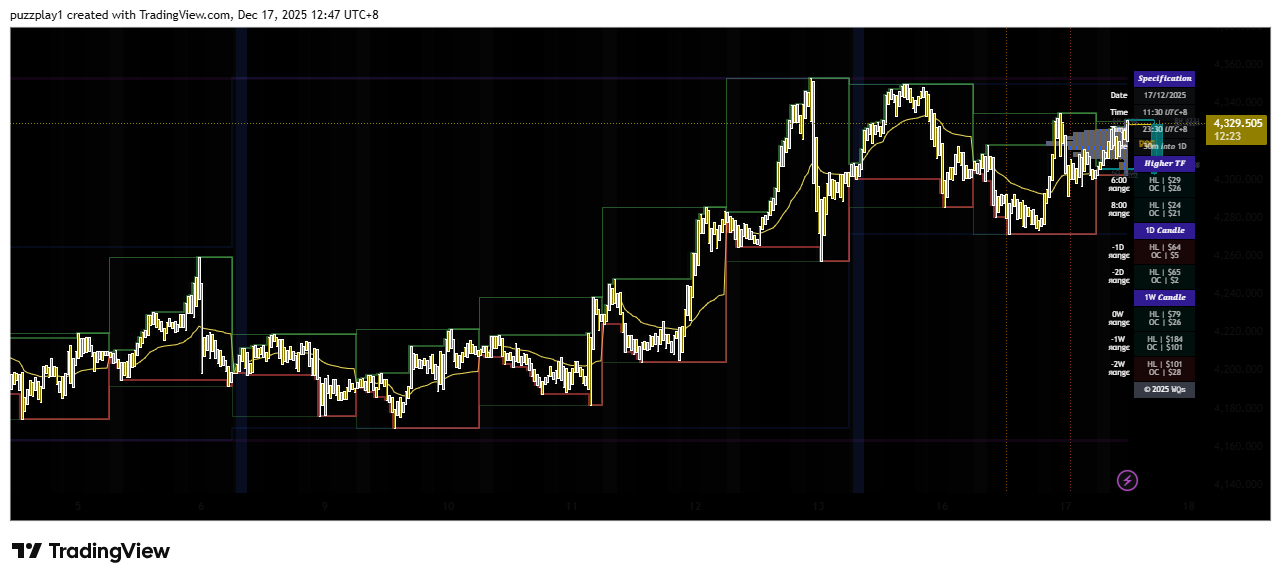